In [56]:
import pandas as pd  
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go


In [57]:
df = pd.read_excel("tree.xlsx", sheet_name="tree")
#df.set_index("ID", inplace=True)
df.head()


,From,To,Level
0,SRQ1,MRQ,1
1,SRQ2,MRQ,1
2,SRQ3,MRQ,1
3,O1,SRQ1,2
4,O2,SRQ1,2


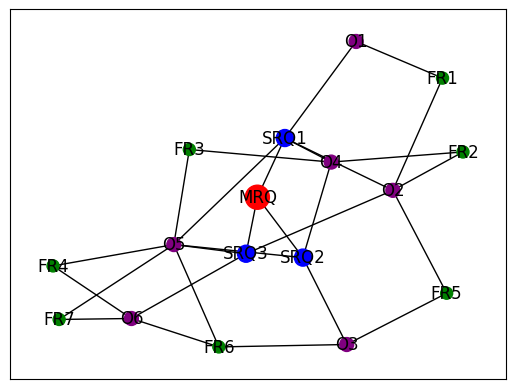

In [58]:
# Add nodes with properties
G = nx.Graph()
nodes_ = []
for i, row in df.iterrows():
    if row["From"] not in nodes_:
        nodes_.append(row["From"])
        G.add_node(row["From"], type=row["Level"], weight=row["Level"])

G.add_node("MRQ", type=0, weight=0)

for i, row in df.iterrows():
    G.add_edge(row["From"],row["To"])

node_colors = {0: 'red', 1: 'blue', 
               2:"purple", 3:"green"}

colors = [node_colors[G.nodes[node]['type']] for node in G.nodes()]

# Define node sizes based on weight
node_sizes = [G.nodes[node]['weight']+1 for node in G.nodes()]
node_sizes= [1/n*300 for n in node_sizes]
# Plot the graph
pos = nx.spring_layout(G)
#pos = nx.fruchterman_reingold_layout(G)
#pos = nx.spectral_layout(G)

nx.draw_networkx(G, pos, node_color=colors, node_size=node_sizes, with_labels=True)

# Show the plot
plt.show()

In [59]:
pos = nx.spring_layout(G, iterations=100,k=0.5)
for n, p in pos.items():
    G.nodes[n]['pos'] = p
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.3, color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [60]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    textposition="top center",

    hoverinfo='text',
    marker=dict(
        #symbol = "diamond",
        showscale=True,
        colorscale='viridis',
        reversescale=True,
        color=colors,
        size=[x/10 for x in node_sizes],
        colorbar=dict(
            thickness=1,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = adjacencies[0]
    node_trace['text'] += tuple([node_info])
title = "Network Graph Demonstration"
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title=title,
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=21, l=5, r=5, t=40),
                # annotations=[dict(
                #     text="Text Here",
                #     showarrow=False,
                #     xref="paper", yref="paper")],
                xaxis=dict(showgrid=False, zeroline=False,
                           showticklabels=False, mirror=True),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, mirror=True)))
fig.show()